# Part II - (Factors Affecting the Trp Durations of Bike Users)
## by (Ace Mary Bajisma)

## Investigation Overview

In this presentation, I investigated the factors responsible for the trip durations based on four main factors which are gender, age, user type and week day


## Dataset Overview

The name of this dataset is FordGoBike which was gotten from the Udacity Classroom. The data set initially contained 183412 rows and 16 columns before wrangling, 9 of which were numerical in nature and 7 were strings. The dataset contained individual attributes of bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('FordGoBike_Cleaned.csv')

## Distribution of Trip Durations

The Trip duration in the dataset ranged from 61 seconds to 84548 seconds. Plotted on a logarithmic scale, the distribution of trip durations took on a unimodal shape, with a peak at around 600-700 seconds.

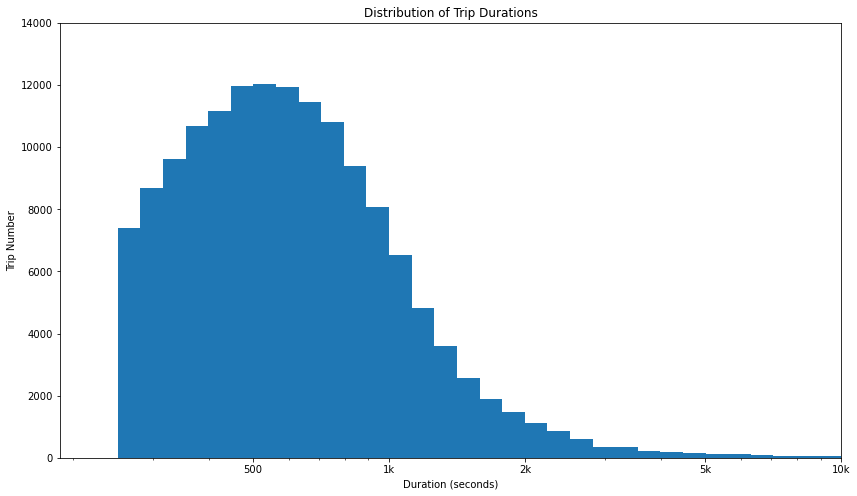

In [3]:
#distribution of trip duration on log scale
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Trip Number')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 14000])
plt.show()

## Distribution of Age

The age duration in the dataset ranged from 20 years to 80 seconds. Plotted on a histogram on standard scale, the distribution of age was skewed to the right with the peak age at around 35 years. There was an inverse relationship between an increase in age and the count (As the age increased, the count reduced).

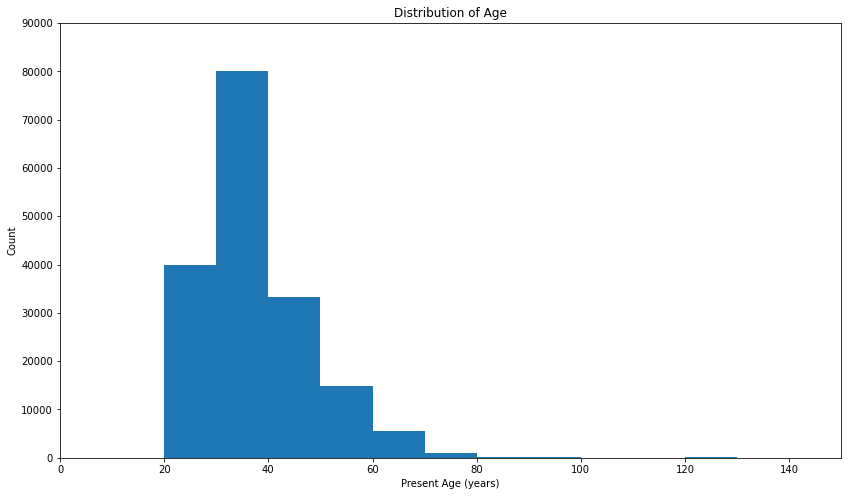

In [4]:
#creating a function to calculate the age of each entry in the dataset as of this year
import datetime as dt
def get_age(birth):
    today = dt.date.today()
    return today.year - birth

df['present_age'] = df.member_birth_year.map(get_age)
df['present_age']

#plotting a histogram to show the age distribution on standard scale
binsize = 10
bins = np.arange(0, df['present_age'].max()+binsize, binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = df, x = 'present_age', bins = bins)
plt.axis([0, 150, 0, 90000])
plt.xlabel('Present Age (years)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

## Week Day with the highest Trip

A bar chart was plotted to depict the number of trips for each week day. There were more trips on Thursdays compared to other week days with a total of 33712.

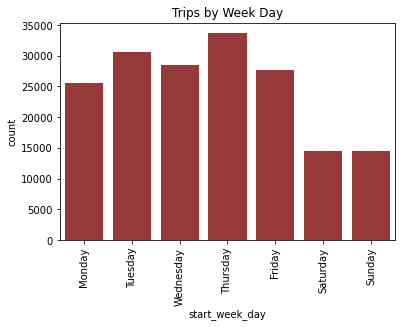

In [5]:
#getting the vakue count for each day of the week based on trips
df_day = df.start_week_day.value_counts()
df_day

#converting df_day to a dataframe
df_week_day = df_day.reset_index(name='count')
df_week_day

#sorting the dataframe by the start_week_day column in ordered day of week format
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_week_day['index'] = df_week_day['index'].astype(cat_type)
df_week_day

#renaming the index column to start_week_day
df_week_day.rename(columns={'index' : 'start_week_day'}, inplace=True)
df_week_day

#bar chart depicting the number of trips for each week day.
colors = ['brown']
ax = sb.barplot(x='start_week_day', y='count', data=df_week_day, palette=colors)
ax.set_title("Trips by Week Day")
plt.xticks(rotation=90);

## Relationship between Trip Duration and User Types

A violin plot was plotted to depict the relationship between the trip duration and user types. It was discovered that users that were subscribers spent lesser time in their trips compared to the users that were customers by almost twice.

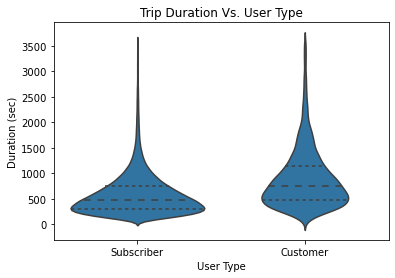

In [6]:
#In this visual, I focused on trip duration that was less than 1 hour (3600 seconds)
trip_duration = df.query("duration_sec <= 3600")

#depicting a violin plot for the relationship between trip duration and user type
base_color = sb.color_palette()[0]
sb.violinplot(data=trip_duration, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration Vs. User Type');

## Trip Duration and Gender based on User Type

A clustered bar chart was plotted to show the relationship between trip duration and gender based on the user types. It was discovered that the female customers spent the highest time in their trips while male subscribers spent the lowest time in their trips.

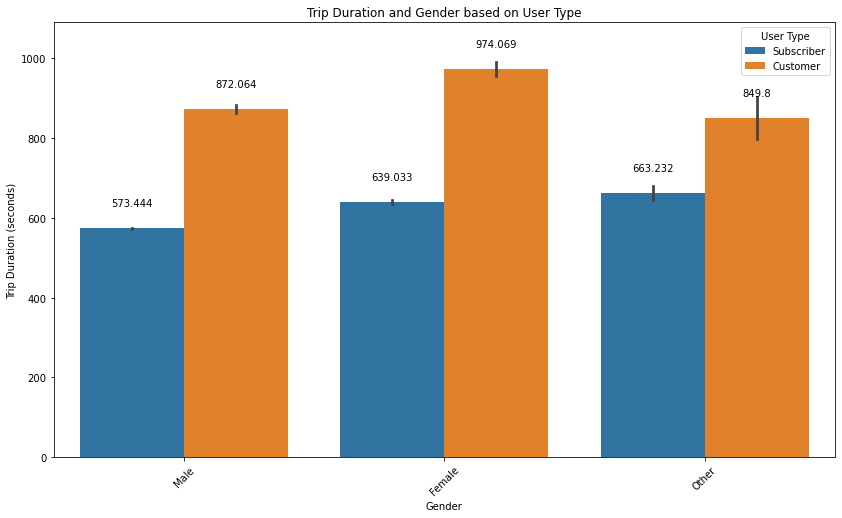

In [7]:
#depicting a clustered bar chart to show the relationship between trip duration and gender based on user type.
plt.figure(figsize=(14,8))

ax = sb.barplot(data = trip_duration, x='member_gender', y='duration_sec', hue ='user_type')

plt.legend(ncol=1, loc='upper right', title='User Type')
plt.xticks(rotation=45) # ax.tick_params(axis='x', rotation=45)

ax.set_title('Trip Duration and Gender based on User Type')
ax.set_xlabel('Gender')
ax.set_ylabel('Trip Duration (seconds)')
ax.margins(y=0.1)

# show values on the bars
for container in ax.containers:
    ax.bar_label(container, padding=20)